In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("fetal_health.csv")
df.shape

(2126, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [15]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

# Filter to turn this into a binary classification

In [84]:
df_subset = df[df.fetal_health.isin([1,3])]
df_subset.shape

(1831, 22)

<AxesSubplot:>

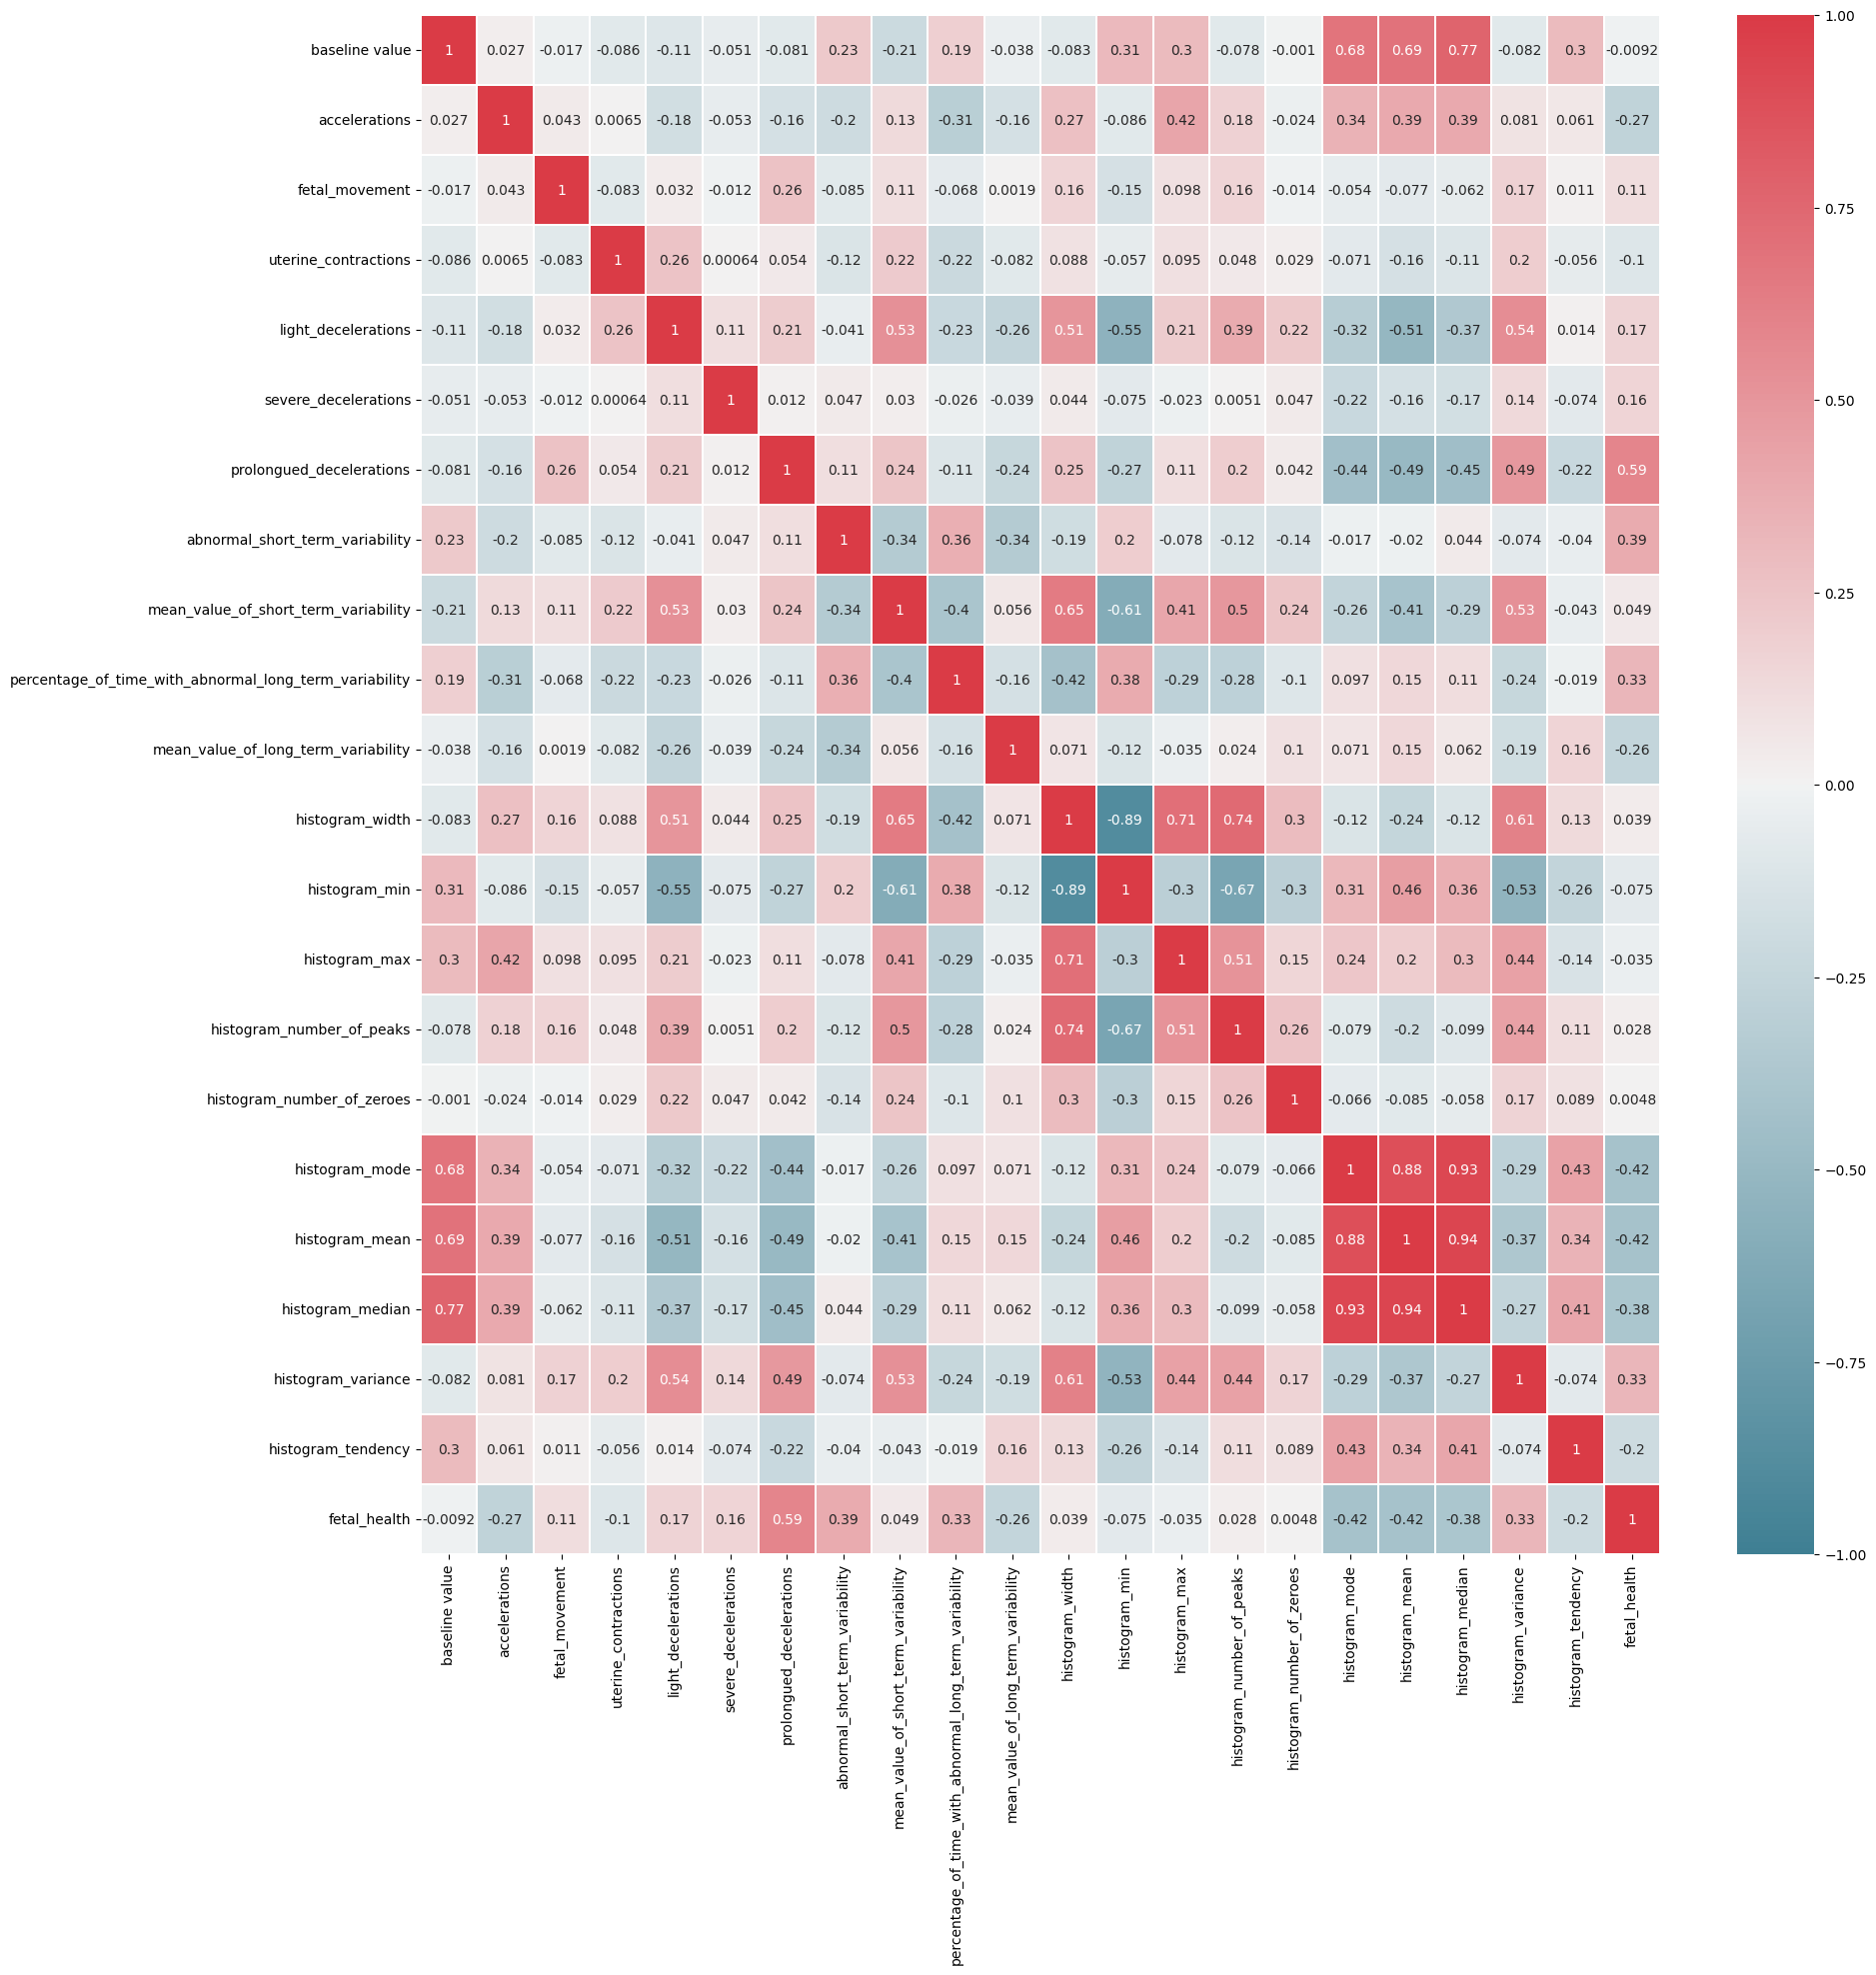

In [26]:
corr_mat = df_subset.corr()
f, ax = plt.subplots(figsize =(20, 20))
sns.heatmap(corr_mat, ax = ax, annot=True, cmap =sns.diverging_palette(220, 10, as_cmap=True), linewidths = 0.1, vmin=-1, vmax=1)

In [90]:
def binary_target_create(df):
    if df["fetal_health"] == 1 :
        return 0
    elif df["fetal_health"] == 3 :
        return 1

df_subset["binary_target"] = df_subset.apply(binary_target_create, axis=1)

C:\Users\sinha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [91]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 1 to 2125
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1831 non-null   float64
 1   accelerations                                           1831 non-null   float64
 2   fetal_movement                                          1831 non-null   float64
 3   uterine_contractions                                    1831 non-null   float64
 4   light_decelerations                                     1831 non-null   float64
 5   severe_decelerations                                    1831 non-null   float64
 6   prolongued_decelerations                                1831 non-null   float64
 7   abnormal_short_term_variability                         1831 non-null   float64
 8   mean_value_of_short_term_variability  

In [92]:
pd.crosstab(df_subset["fetal_health"],df_subset["binary_target"])

binary_target,0,1
fetal_health,,
1.0,1655,0
3.0,0,176


In [94]:
y = np.array(df_subset["binary_target"])

In [95]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
x = np.array(df_subset.drop(columns = ["fetal_health","binary_target"]))
             

In [100]:
x.shape

(1831, 21)

In [101]:
x

array([[1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       [1.34e+02, 3.00e-03, 0.00e+00, ..., 1.37e+02, 1.30e+01, 1.00e+00],
       ...,
       [1.40e+02, 0.00e+00, 0.00e+00, ..., 1.45e+02, 1.00e+00, 1.00e+00],
       [1.40e+02, 0.00e+00, 0.00e+00, ..., 1.45e+02, 2.00e+00, 0.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])